Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy.

It happens that one of my most important family recently tested with diabetes. The puzzle thing is that this family doesn't have overweight issue (He is even quite slim) while his couple doesn't have diabete issue even with overweight problem.

It will be great if there is a model can predict the risk(probabily) of getting diabetes based on some life attributes and may increase the chance of prevention of the disease. 

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [69]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


Simple statistics:
1. the number of each diabetes level (0,1,2)
2. Means of each attributes within different diabete level

In [110]:
len(df[df['Diabetes_012'] == 0]),len(df[df['Diabetes_012'] == 1]),len(df[df['Diabetes_012'] == 2])

(213703, 4631, 35346)

In [111]:
df.groupby('Diabetes_012').mean()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,0.371132,0.379171,0.957104,27.742521,0.429680,0.031628,0.071833,0.779077,0.643023,0.821439,0.061843,0.949739,0.079610,2.372391,2.944404,3.582416,0.132282,0.433985,7.786559,5.106629,6.208663
1.0,0.629022,0.620816,0.986612,30.724466,0.492766,0.057223,0.143382,0.678471,0.602246,0.768948,0.044915,0.945152,0.129346,2.975599,4.529907,6.348305,0.277478,0.437702,9.083351,4.784496,5.351112
2.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,0.756408,0.023539,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094


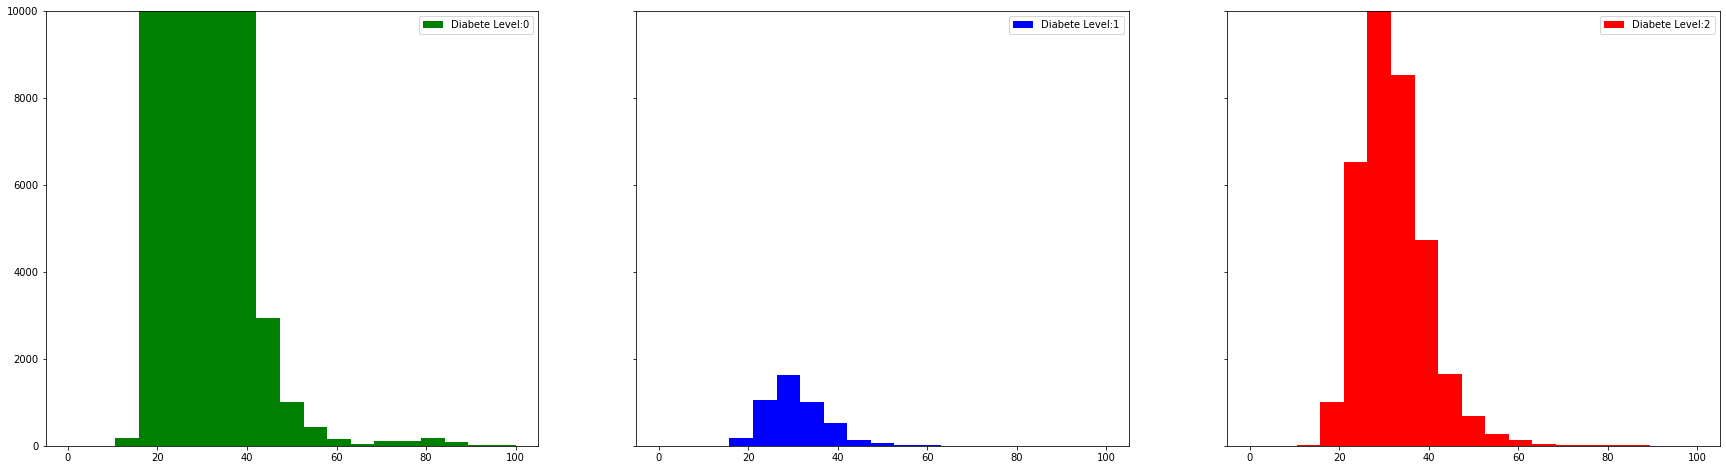

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True)
fig.set_figwidth(30)
fig.set_figheight(8)
colors = ['g','b','r']
num = 0

for col in ax:
    col.hist(df[df['Diabetes_012'] == num]['BMI'], label = "Diabete Level:" + str(num), bins = np.linspace(0,100,20)
            , color = colors[num])
    col.legend()
    num += 1
plt.ylim([0,10000])
plt.show()

Figure 1a: Histogram for BMI doesn't seem to be very informative

No handles with labels found to put in legend.


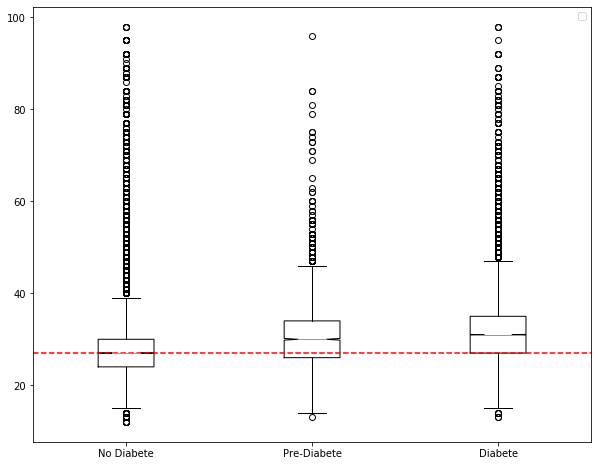

In [74]:
fig=plt.figure(figsize=(10,8))
plt.boxplot((df[df['Diabetes_012'] == 0]['BMI'],df[df['Diabetes_012'] == 1]['BMI'],df[df['Diabetes_012'] == 2]['BMI']),3,
         labels = ['No Diabete','Pre-Diabete','Diabete'])
plt.axhline(df[df['Diabetes_012'] == 0]['BMI'].median(), c='r', linestyle='--')

plt.legend()

Figure 1b: Bar charts for BMI seems easy to be comprehened

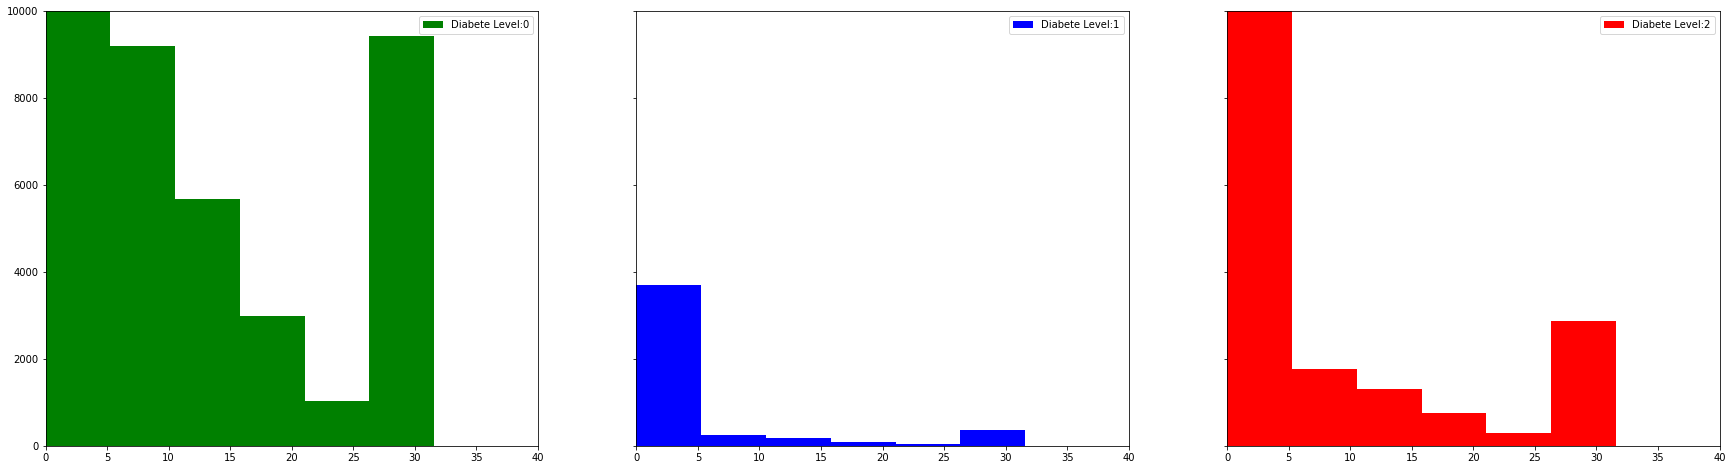

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True)
fig.set_figwidth(30)
fig.set_figheight(8)
colors = ['g','b','r']
num = 0

for col in ax:
    col.hist(df[df['Diabetes_012'] == num]['MentHlth'], label = "Diabete Level:" + str(num), bins = np.linspace(0,100,20)
            , color = colors[num])
    col.legend()
    num += 1
plt.ylim([0,10000])
plt.xlim([0,40])
plt.show()

Figure 2a: Histogram for Mental Health doesn't seem to be very informative

No handles with labels found to put in legend.


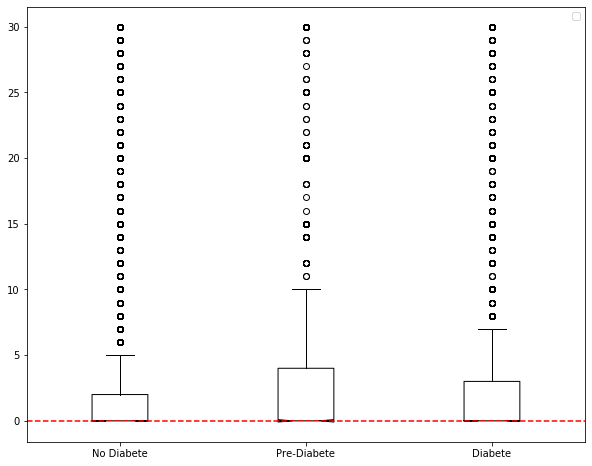

In [76]:
fig=plt.figure(figsize=(10,8))
plt.boxplot((df[df['Diabetes_012'] == 0]['MentHlth'],df[df['Diabetes_012'] == 1]['MentHlth'],df[df['Diabetes_012'] == 2]['MentHlth']),3,
         labels = ['No Diabete','Pre-Diabete','Diabete'])
plt.axhline(df[df['Diabetes_012'] == 0]['MentHlth'].median(), c='r', linestyle='--')

plt.legend()

Figure 2b: Bar charts for Mental Health seems easy to be comprehened

In [199]:
###====================================Use some statistics method to QC the data=============================================

# Anova tests for contineous variables
def anova_com(attr):
    #print(stats.f_oneway(df[df['Diabetes_012'] == 0][attr],
     #          df[df['Diabetes_012'] == 1][attr],
      #         df[df['Diabetes_012'] == 2][attr]))
    return stats.f_oneway(df[df['Diabetes_012'] == 0][attr], df[df['Diabetes_012'] == 1][attr],df[df['Diabetes_012'] == 2][attr])

# Chi-s
def chi_square_com(attr):
    num_cat = df[attr].unique()
    #print(stats.chi2_contingency([[df[(df['Diabetes_012'] == 0) & (df[attr] == i)][attr].count() for i in num_cat],
                                  #[df[(df['Diabetes_012'] == 1) & (df[attr] == i)][attr].count() for i in num_cat],
                                  #[df[(df['Diabetes_012'] == 2) & (df[attr] == i)][attr].count() for i in num_cat]]))
    return stats.chi2_contingency([[df[(df['Diabetes_012'] == 0) & (df[attr] == i)][attr].count() for i in num_cat],
                                  [df[(df['Diabetes_012'] == 1) & (df[attr] == i)][attr].count() for i in num_cat],
                                  [df[(df['Diabetes_012'] == 2) & (df[attr] == i)][attr].count() for i in num_cat]])

In [ ]:
''' z test prepared for paired comparison
def ztest_com(attr):
    com = [(0,1),(0,2),(1,2)]
    print('ztest_param:', attr)
    for i in range(0,3):
        z, p = ztest(df[df['Diabetes_012'] == com[i][0]][attr],df[df['Diabetes_012'] == com[i][1]][attr])
        print('Compare set:',com[i], 'z:',z, 'p:',p) 
'''

In [108]:
anova_com('BMI')

F_onewayResult(statistic=6768.361066999288, pvalue=0.0)


In [115]:
anova_com('MentHlth')

F_onewayResult(statistic=717.1173715522025, pvalue=2.735178567403e-311)


In [200]:
chi_square_com('Sex')

(250.85057509520166,
 3.376678611575899e-55,
 2,
 array([[119600.55866446,  94102.44133554],
        [  2591.7754415 ,   2039.2245585 ],
        [ 19781.66589404,  15564.33410596]]))

In [201]:
chi_square_com('Smoker')

(1010.5117511111928,
 3.7167324294119075e-220,
 2,
 array([[ 94706.45052428, 118996.54947572],
        [  2052.31359587,   2578.68640413],
        [ 15664.23587985,  19681.76412015]]))

In [184]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Split the columns into two groups: categorial attributes (chi-square test) and continuous attributes (anova test).
Test their relation ship with diabetes level individually.

In [186]:
Categorical_list = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'DiffWalk', 'Sex']

Continuous_list = ['BMI','MentHlth', 'PhysHlth','Age', 'Education','Income']

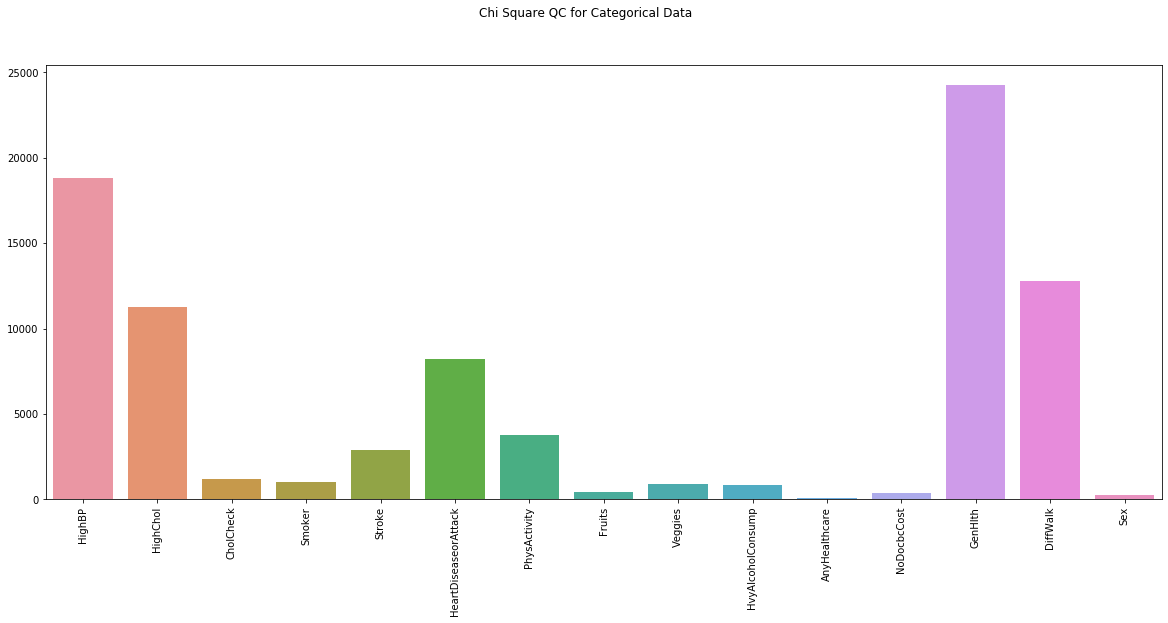

In [204]:
chi_list_stat = []
chi_list_p = []
for attr in Categorical_list:
    stat, p = chi_square_com(attr)[0], chi_squre_com(attr)[1]
    chi_list_stat.append(stat)
    chi_list_p.append(p)

fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=90)
fig.suptitle('Chi Square QC for Categorical Data')
sns.barplot(Categorical_list, chi_list_stat)

Figure 3a: Chi Square QC for Categorical Data

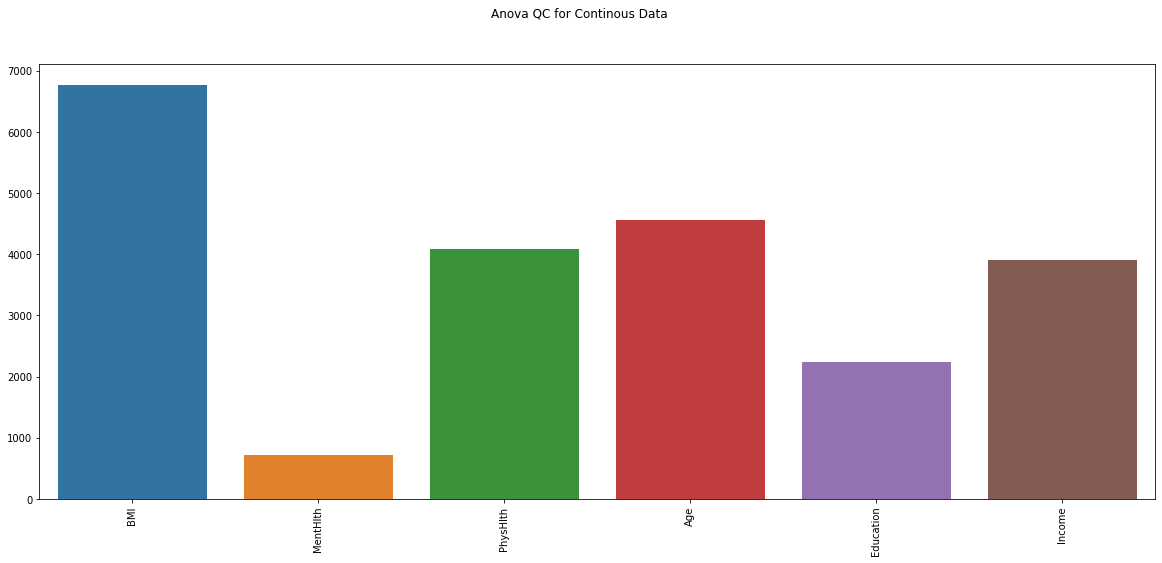

In [195]:
anov_list_stat = []
anov_list_p = []
for attr in Continuous_list:
    stat, p = anova_com(attr)[0], anova_com(attr)[1]
    anov_list_stat.append(stat)
    anov_list_p.append(p)

fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(axis='x', rotation=90)
fig.suptitle('Anova QC for Continous Data')
sns.barplot(Continuous_list, anov_list_stat)

Figure 3b: Anova QC for Continous Data

Pearson Correlation is another option of the correlation QC for different attributes

In [148]:
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


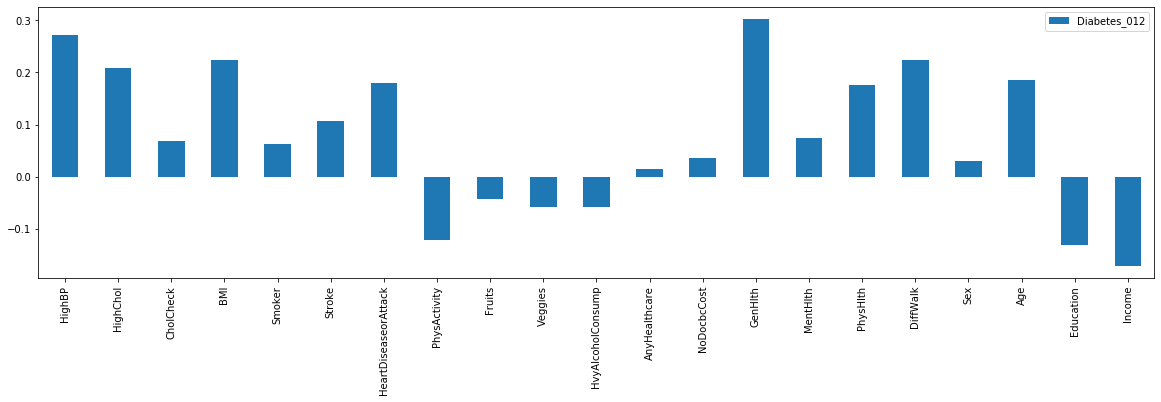

In [175]:
df.corr().loc[df.corr().columns != 'Diabetes_012'].plot.bar(y = 'Diabetes_012',figsize=(20,5))

Figure 4: Correlations of Attributes with Diabete Levels

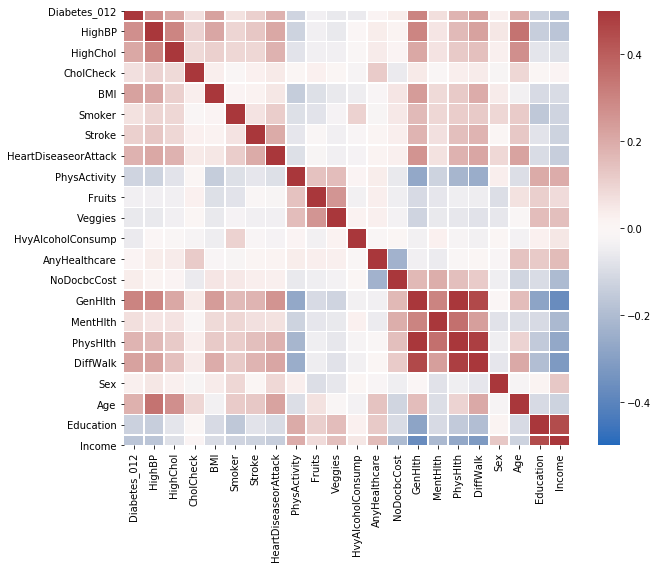

In [162]:
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(df.corr(),  linewidths=.5, cmap = 'vlag' , vmin=-0.5, vmax=0.5, ax=ax)

In [ ]:
Figure 5: Correlations among all attributes

Proposal:
1. each attribute seems to have some correlation with diabetes level with different strength based on the simple statistic tests;
2. propose to create several different models to predict the level of diabetes based on the combinations of life parameters:
    a. Start with logistic model with softmax (3 levels of diabetes);
    b. Propose to test random forests (with some boosting) and even deep neural network (also with softmax cross entropy as coist function) 